In [26]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [27]:
def toBinary(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] == 255:
                image[i,j] = 1
            else :
                image[i,j] = 0
    return image

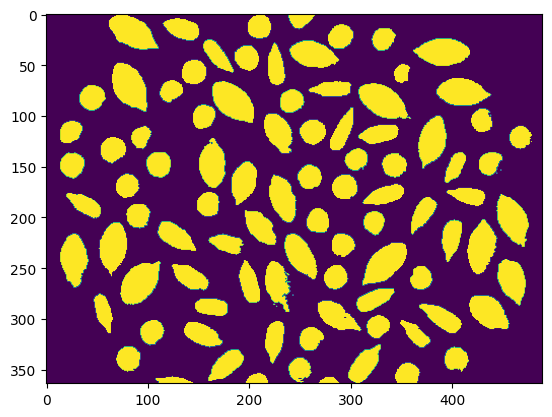

In [28]:
#Chargement Image

image = cv.imread("graine.jpg", cv.IMREAD_GRAYSCALE)
_, image = cv.threshold(image, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

image = toBinary(image)

plt.imshow(image)

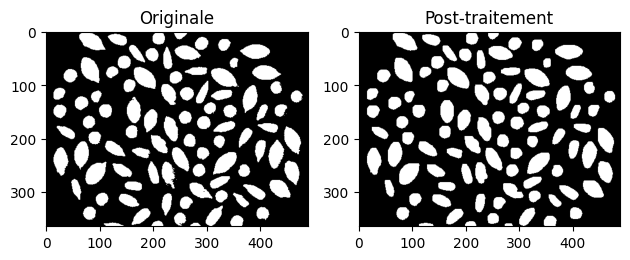

In [29]:
#Ouverture cercle
structuring_element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (8,8))
opening = cv.morphologyEx(image, cv.MORPH_OPEN, structuring_element)

plt.subplot(1,2,1)
plt.imshow(image, cmap= 'gray')
plt.title("Originale")
plt.subplot(1,2,2)
plt.imshow(opening, cmap= 'gray')
plt.title("Post-traitement")
plt.tight_layout()
plt.show()

In [30]:
def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    plt.imshow(labeled_img)
    plt.title("Composantes")

92
92
92
92
90
87
27
1
[0, 0, 0, 0, 2, 3, 60, 26]


(array([6., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <BarContainer object of 10 artists>)

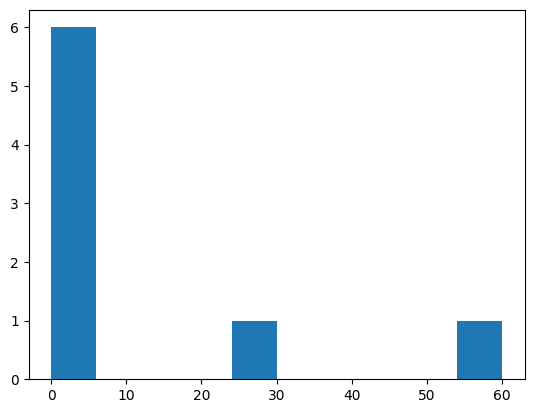

In [32]:
num_labels, labels_im = cv.connectedComponents(opening)

def imreconstruct(marker: np.ndarray, mask: np.ndarray, radius: int = 1):
    """Iteratively expand the markers white keeping them limited by the mask during each iteration.

    :param marker: Grayscale image where initial seed is white on black background.
    :param mask: Grayscale mask where the valid area is white on black background.
    :param radius Can be increased to improve expansion speed while causing decreased isolation from nearby areas.
    :returns A copy of the last expansion.
    Written By Semnodime.
    """
    kernel = np.ones(shape=(radius * 2 + 1,) * 2, dtype=np.uint8)
    while True:
        expanded = cv.dilate(src=marker, kernel=kernel)
        cv.bitwise_and(src1=expanded, src2=mask, dst=expanded)

        # Termination criterion: Expansion didn't change the image at all
        if (marker == expanded).all():
            return expanded
        marker = expanded

def comptage(image, nombre_composantes_connexes):
    t = 1
    N = []
    while nombre_composantes_connexes > 1 :
        structuring_element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (t,t))
        erode = cv.erode(image, structuring_element)
        image = imreconstruct(image, erode)
        nombre_composantes_connexes_2, _ = cv.connectedComponents(image)
        t = t + 1
        print(nombre_composantes_connexes_2)
        N.append(nombre_composantes_connexes - nombre_composantes_connexes_2)
        nombre_composantes_connexes = nombre_composantes_connexes_2
    return N

histogramme = comptage(opening, num_labels)
print(histogramme)

plt.hist(histogramme)